In [1]:
%gui wx
%matplotlib inline

In [2]:
from __future__ import division
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
#from mayavi import mlab
import seaborn as sns
from vtk_rw import read_vtk, write_vtk
import operator

In [3]:
def make_cmap(c):
    cmap = np.asarray(sns.color_palette('Blues', c-1))
    cmap = np.concatenate((np.array([[0.8,0.8,0.8]]), cmap), axis=0)
    cmap = np.concatenate((cmap, np.ones((c,1))), axis=1)
    cmap_seaborn = [tuple(cmap[i]) for i in range(len(cmap))]

    cmap_255=np.zeros_like(cmap)
    for row in range(cmap.shape[0]):
        cmap_255[row]=[np.floor(i * 255) for i in cmap[row]]
    cmap_255=cmap_255.astype(int)
    
    return cmap_seaborn, cmap_255

In [4]:
def chebapprox(profiles, degree):
    profiles=np.array(profiles)
    cheb_coeffs=np.zeros((profiles.shape[0],degree+1))
    cheb_polynoms=np.zeros((profiles.shape[0],profiles.shape[1]))
    for c in range(profiles.shape[0]):
        x=np.array(range(profiles.shape[1]))
        y=profiles[c]
        cheb_coeffs[c]=np.polynomial.chebyshev.chebfit(x, y, degree)
        cheb_polynoms[c]=np.polynomial.chebyshev.chebval(x, cheb_coeffs[c])
    return cheb_coeffs, cheb_polynoms

### load data

In [5]:
hemi='rh'
embed=10
masktype='025_5'

mesh_file = '/SCR/data/ohbm2016/lowres_rh_d.vtk'
mask_file = '/SCR/data/ohbm2016/rh_fullmask_%s.npy'%masktype
embed_file='/SCR/data/ohbm2016/mask_%s/rh_embed_10.npy'%masktype
t1_file = '/SCR/data/ohbm2016/avg_rh_profiles.npy'

In [6]:
colors = sns.color_palette('cubehelix', 10)

In [7]:
v,f,d = read_vtk(mesh_file)
mask = np.load(mask_file)
embedding_full=np.load(embed_file)
t1_profiles=np.load(t1_file)

In [25]:
coeff, poly = chebapprox(t1_profiles[:,2:9], 5)

In [43]:
time.sleep

KeyboardInterrupt: 

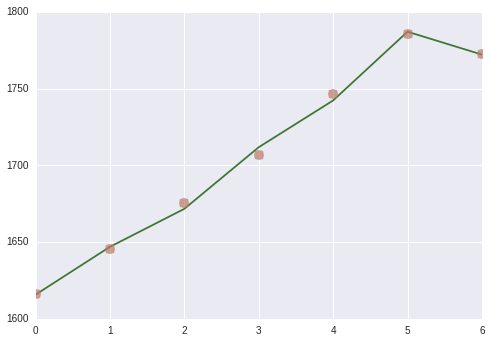

In [44]:
#node = 5000
x = np.array(range(t1_profiles[:,2:9].shape[1]))
for node in range(v.shape[0]):
    plt.plot(t1_profiles[node, 2:9], color=colors[3])
    plt.plot(np.polynomial.chebyshev.chebval(x, coeff[node]), 
             color=colors[5], linestyle='None', marker='o', markersize=10, alpha=0.7);
    time.sleep(100)

In [30]:
embed_1 = embedding_full[:,0]
embed_2 = embedding_full[:,1]
t1_avg = np.mean(t1_profiles[:,2:9], axis=1)
coeff_0 = coeff[:,0]
coeff_1 = coeff[:,1]
coeff_2 = coeff[:,2]
coeff_3 = coeff[:,3]

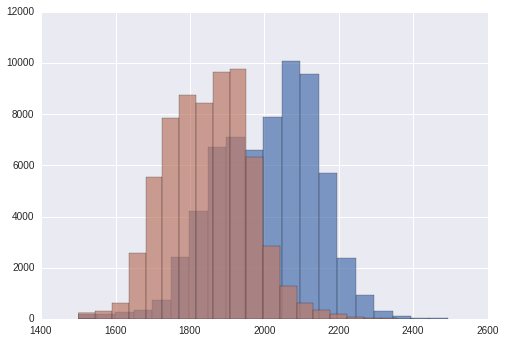

In [31]:
t1_avg_plot = np.delete(t1_avg, np.where(t1_avg<1500))
t1_avg_plot = np.delete(t1_avg_plot, np.where(t1_avg_plot>2500))
coeff_0_plot = np.delete(coeff_0, np.where(coeff_0<1500))
coeff_0_plot = np.delete(coeff_0_plot, np.where(coeff_0_plot>2500))
plt.hist(t1_avg_plot, bins=20, alpha=0.7);
plt.hist(coeff_0_plot, bins=20, alpha=0.7, color = colors[5]);

In [32]:
t1_idx=np.where(t1_avg<=1500)
scatter_t1avg = np.delete(t1_avg, t1_idx)
scatter_coeff0 = np.delete(coeff_0, t1_idx)
scatter_coeff1 = np.delete(coeff_1, t1_idx)
scatter_coeff2 = np.delete(coeff_2, t1_idx)
scatter_coeff3 = np.delete(coeff_3, t1_idx)
scatter_embed1 = np.delete(embed_1, t1_idx)
scatter_embed2 = np.delete(embed_2, t1_idx)

t1_idx_2=np.where(t1_avg>=2500)
scatter_t1avg = np.delete(scatter_t1avg, t1_idx_2)
scatter_coeff0 = np.delete(scatter_coeff0, t1_idx_2)
scatter_coeff1 = np.delete(scatter_coeff1, t1_idx_2)
scatter_coeff2 = np.delete(scatter_coeff2, t1_idx_2)
scatter_coeff3 = np.delete(scatter_coeff3, t1_idx_2)
scatter_embed1 = np.delete(scatter_embed1, t1_idx_2)
scatter_embed2 = np.delete(scatter_embed2, t1_idx_2)

embed_idx=np.where(scatter_embed1==0)
#embed_idx=np.where(scatter_embed2==0) -->same
scatter_t1avg = np.delete(scatter_t1avg, embed_idx)
scatter_coeff0 = np.delete(scatter_coeff0, embed_idx)
scatter_coeff1 = np.delete(scatter_coeff1, embed_idx)
scatter_coeff2 = np.delete(scatter_coeff2, embed_idx)
scatter_coeff3 = np.delete(scatter_coeff3, embed_idx)
scatter_embed1 = np.delete(scatter_embed1, embed_idx)
scatter_embed2 = np.delete(scatter_embed2, embed_idx)

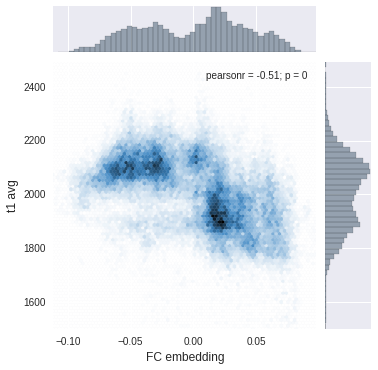

In [33]:
g = sns.jointplot(scatter_embed1, scatter_t1avg, kind="hex", size=5, color=colors[1])
g.set_axis_labels('FC embedding', 't1 avg', fontsize=12)

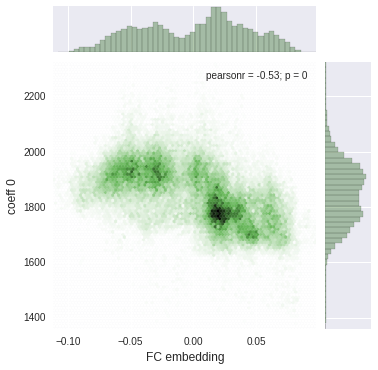

In [41]:
g = sns.jointplot(scatter_embed1, scatter_coeff0, kind="hex", size=5, color=colors[3])
g.set_axis_labels('FC embedding', 'coeff 0', fontsize=12)

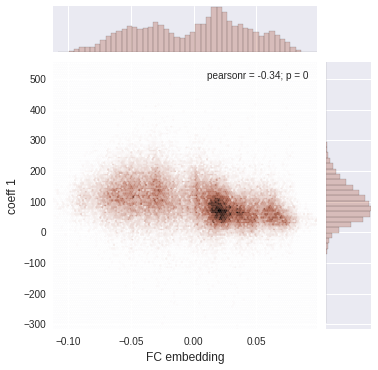

In [35]:
g = sns.jointplot(scatter_embed1, scatter_coeff1, kind="hex", size=5, color=colors[5])
g.set_axis_labels('FC embedding', 'coeff 1', fontsize=12)

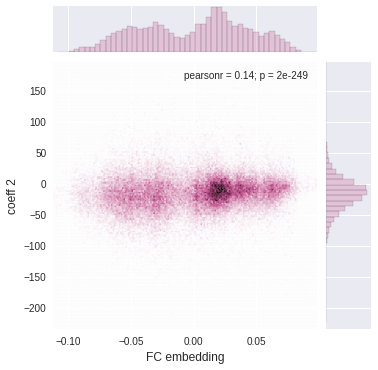

In [36]:
g = sns.jointplot(scatter_embed1, scatter_coeff2, kind="hex", size=5, color=colors[6])
g.set_axis_labels('FC embedding', 'coeff 2', fontsize=12)

In [ ]:
root_t1 = np.zeros((t1.shape[0],))
for v in range(t1.shape[0]):
    root_t1[v] = np.mean(t1[v][3:8])
root_embed=embed[:,0]

root_mask = np.ones((t1.shape[0],))
root_mask[np.where(root_t1<2100)]=0
root_mask[np.where(root_t1>2300)]=0
root_mask[np.where(root_embed>0.01)]=0
root_mask[np.where(root_embed<-0.02)]=0
root_mask[np.where(root_embed==0)]=0


idx_1=np.where(root_t1<2100)
root_t1=np.delete(root_t1, idx_1)
root_embed=np.delete(root_embed, idx_1)
idx_2=np.where(root_t1>2300)
root_t1=np.delete(root_t1, idx_2)
root_embed=np.delete(root_embed, idx_2)
idx_3=np.where(root_embed>0.01)
root_t1=np.delete(root_t1, idx_3)
root_embed=np.delete(root_embed, idx_3)
idx_4=np.where(root_embed<-0.02)
root_t1=np.delete(root_t1, idx_4)
root_embed=np.delete(root_embed, idx_4)
idx_5=np.where(root_embed==0)
root_t1=np.delete(root_t1, idx_5)
root_embed=np.delete(root_embed, idx_5)


In [ ]:
pal, pal_255 = make_cmap(3)

In [ ]:
sns.palplot(pal)

In [ ]:
mlab.figure(bgcolor=(1, 1, 1))
img = mlab.triangular_mesh(x,y,z,triangles,scalars=root_mask, colormap='Greys')
lut = img.module_manager.scalar_lut_manager.lut.table.to_array()
img.module_manager.scalar_lut_manager.lut.table = pal_255
mlab.draw()
mlab.show()

In [ ]:
fig = plt.figure(figsize=(10,5))
plt.scatter(scatter_embed, scatter_t1, alpha=0.2)
plt.xlabel('1st embedding component')
plt.ylabel('Intracortical avg T1 (>1500)')